# Heavy Traffic Indicators on I-94 Freeway


## 1. Introduction

In this project, we analyze the dataset about  [I-94](https://en.wikipedia.org/wiki/Interstate_94) interstate highway or freeway. We are going to find the indicators that cause high traffic volume based on type of the weather and time of the day.

This dataset is available at the [UCI machine learning repository ](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). It is noted that the dataset is collected particularly between the stations Minneapolis and St Paul, MN, which is provided on the website.

The **data dictionary** is provided as follows:
- **holiday:** Categorical US National holidays plus regional holiday, Minnesota State Fair 
- **temp:** Numeric Average temp in kelvin 
- **rain_1h:** Numeric Amount in mm of rain that occurred in the hour 
- **snow_1h:** Numeric Amount in mm of snow that occurred in the hour 
- **clouds_all:** Numeric Percentage of cloud cover 
- **weather_main:** Categorical Short textual description of the current weather 
- **weather_description:** Categorical Longer textual description of the current weather 
- **date_time:** DateTime Hour of the data collected in local CST time 
- **traffic_volume:** Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## 2. Read and Explore the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
i94_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94_data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48204 rows and 9 columns in the dataset. The dataset has zero null values which means there are no missing values. This helps us to continue with the same dataset without removing any rows based on the missing infomration.

In [4]:
i94_data['date_time'] = pd.to_datetime(i94_data['date_time'])
print(i94_data['date_time'].head())
i94_data.head()
i94_data.describe()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


## 3. Data Cleaning

From the above information, the least value of the temperature column is '0K' which means -273 degrees Celsius and the large value of the rain per hr column is 9831.30 mm. Both the values seem impossible to happen in real conditions. Let's have a look at these values and remove them if they are not in many.

In [5]:
i94_data['temp'].value_counts().sort_index()
temper= i94_data.loc[i94_data['temp'] == 0.0]
temper
i94_data = i94_data[i94_data['temp']>0.0]
i94_data.shape

(48194, 9)

In [6]:
i94_data['rain_1h'].value_counts().sort_index()

0.00       44727
0.25         948
0.26           2
0.27           5
0.28          23
           ...  
28.70          2
31.75          1
44.45          1
55.63          1
9831.30        1
Name: rain_1h, Length: 372, dtype: int64

In [7]:
i94_data = i94_data[i94_data['rain_1h'] < 9831.30]
i94_data.shape

(48193, 9)

## 4.  Analysis of Traffic Volume


First, we check how the traffic volume column is distributed.

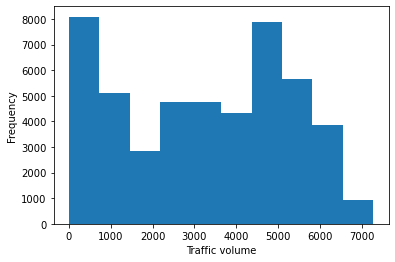

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(i94_data['traffic_volume'])
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
#plt.minorticks_on()
plt.show()

In [9]:
i94_data['traffic_volume'].describe()

count    48193.000000
mean      3260.174029
std       1986.754010
min          0.000000
25%       1194.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the above figure and table, we can notice the following points. 
- The frequency is higher when the traffic volume ranges from 0-1000 and 4500-5500.
- About 25% of the time, traffic volume is 1193, it may be during off-office or night timing. 
- About 25% of the time, traffic volume is 4933, which may be during work hours

Let's divide the data set into day and night time in order to have a clear view. The following time periods are considered for day and night times:

- Day:  7 AM - 7 PM
- Night 7 PM - 7 AM


### 4.1 Traffic Volume based on Time Indicators

In [10]:

day = i94_data[(i94_data['date_time'].dt.hour>=7) & (i94_data['date_time'].dt.hour < 19)]

print(day.shape)

night = i94_data[(i94_data['date_time'].dt.hour >= 19) | (i94_data['date_time'].dt.hour < 7)]
print(night.shape)

(23874, 9)
(24319, 9)


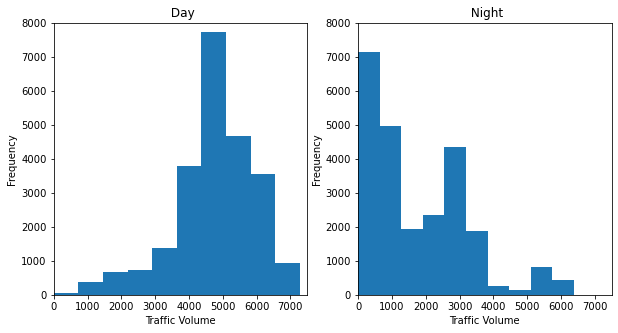

In [11]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title(' Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title(' Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [12]:
day['traffic_volume'].describe()

count    23874.000000
mean      4762.303761
std       1174.181562
min          0.000000
25%       4253.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24319.000000
mean      1785.530943
std       1441.868127
min          0.000000
25%        530.500000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The day and night histograms show that day-time faces heavy traffic as 75% of the time there are more than 4252 cars per hour on the road while the night-time traffic volume values are less than 2819 for 75% of the time.

In conclusion, we focus more on day-time data towards our goal.



#### A. Traffic Volume over the Years

            temp   rain_1h   snow_1h  clouds_all  traffic_volume
year                                                            
2012  275.846975  0.000000  0.000000   66.133997     4675.346861
2013  280.003337  0.134236  0.000000   53.891145     4834.084298
2014  278.384517  0.287605  0.000000   52.031289     4768.187317
2015  289.060314  0.237949  0.002233   43.819580     4748.448485
2016  283.671907  0.128340  0.000274   52.537356     4637.322805
2017  282.341220  0.000000  0.000000   54.954867     4865.961752
2018  283.825283  0.135757  0.000000   51.989171     4726.280534


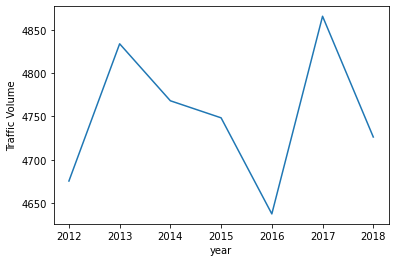

In [14]:
day['year'] = day['date_time'].dt.year
by_year = day.groupby('year').mean()
print(by_year)
by_year['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.show()

#### B. Traffic Volume over the Months

             temp   rain_1h   snow_1h  clouds_all  traffic_volume         year
month                                                                         
1      265.483409  0.015080  0.000631   58.554108     4495.613727  2015.768036
2      266.969947  0.004024  0.000000   51.609644     4715.096441  2015.669346
3      273.619940  0.015839  0.000000   56.827811     4889.409560  2015.735470
4      279.661071  0.105343  0.000000   59.221525     4906.894305  2015.681467
5      289.282668  0.130863  0.000000   56.548825     4911.121609  2015.558770
6      294.576068  0.271121  0.000000   48.612374     4898.019566  2015.875727
7      296.782812  0.278103  0.000000   42.162810     4594.640303  2015.604123
8      295.119191  0.228113  0.000000   42.556892     4928.302035  2015.962997
9      292.520287  0.289807  0.000000   45.184112     4870.783145  2016.147611
10     284.081011  0.016065  0.000000   53.497990     4921.234922  2014.753590
11     276.698007  0.006200  0.000000   56.697187   

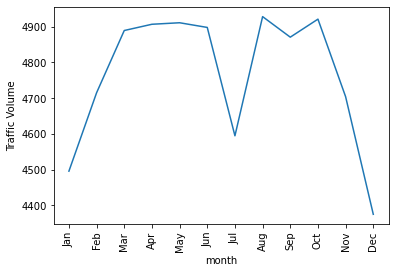

In [15]:

day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
print(by_month)
by_month['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(np.arange(1,13),labels,rotation='90')
plt.show()

The above figure shows that the traffic volume is high during March to October except July. We need to find what is the reason particularly for July.

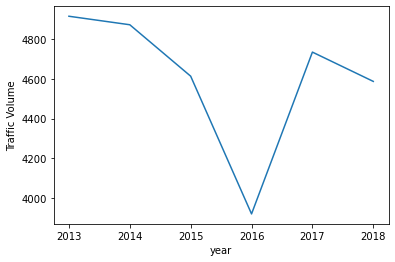

In [16]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.ylabel('Traffic Volume')
plt.show()

From the above plot, it is clear that July 2016 had low traffic volume. This is due to a construction or maintenance of the way as it is evident in this [article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).
**The warmer months in a year face heavy traffic compared to the colder months.**

Let's check how the traffic volume looks during the day of a week. To do this, we isolate the day time data according to the day of a week.

#### C. Traffic Volume over the Days

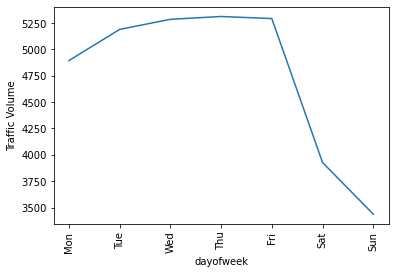

In [17]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.xticks(np.arange(7),labels,rotation='90')
plt.ylabel('Traffic Volume')
plt.show()


From the above figure, the traffic volume is high during the working days. This may be due to people travel to work and back to home. Let's shift to hourly data to get a clear picture of this.

#### D. Traffic Volume over the hours

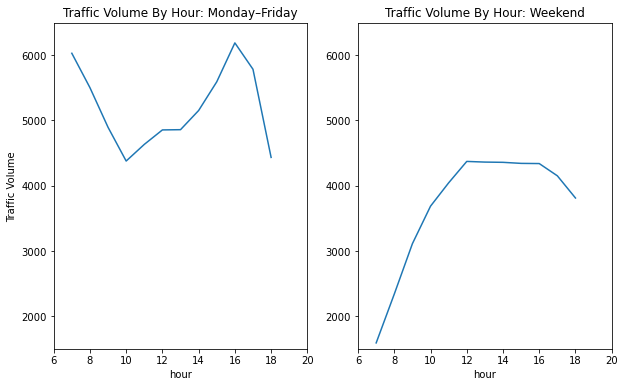

In [18]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()


plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

As expected, traffic volume is heavy from 7 AM to 4 PM during the week days

### 4.2 Weather Indicators

In [19]:
day.corr()['traffic_volume']

temp              0.125502
rain_1h          -0.040676
snow_1h           0.001260
clouds_all       -0.033311
traffic_volume    1.000000
year             -0.003761
month            -0.022678
dayofweek        -0.416257
hour              0.172401
Name: traffic_volume, dtype: float64

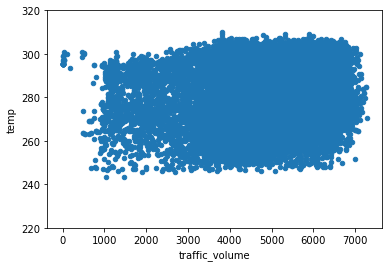

In [20]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(220, 320) 
plt.show()

The correlation betweem temperature and traffic volume shows that temperature is not a strong indicator for traffic volume. Let's see if other types of weather conditions affect it.

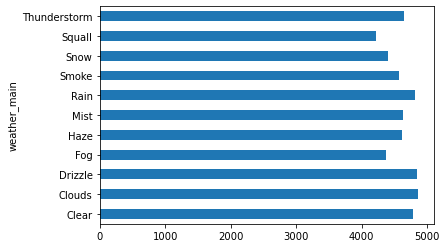

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Although all weather types show similar trends, none of them contributes to heavy traffic volume. This makes finding a heavy traffic indicator more difficult. Let's also group by `weather_description`, which has a more detailed weather information

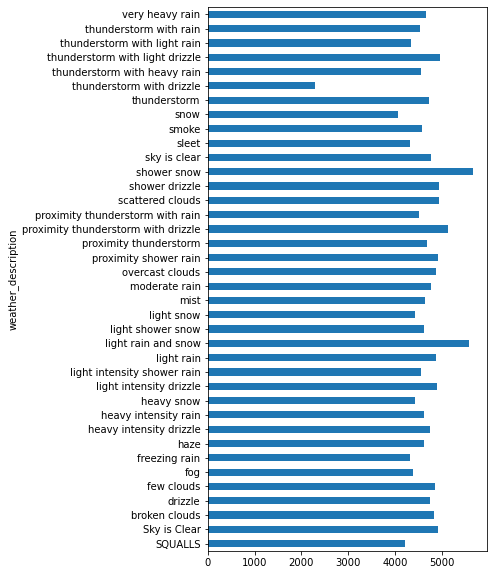

In [22]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

From the above plot, the following types weather conditions cause in increase of the traffic volume
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle



## Conclusions:

 We summarize our findings below. Traffic volume is effected by time and weather indicators.
 
 - Time Indicators
   - During the day time, traffic is heavy
   - Working days show high volume compared to weekends
   - Warmer months have heavy traffic than cold months
  
  
- Weather indicators
  - Shower snow
  - Light rain and snow
  - Proximity thunderstorm with drizzle


